# (6주차) 10월19일
> 드랍아웃, fastai를 이용한 학습, CPU vs GPU

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### 강의영상

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-wx30jOB2SlQDFwQDORTZOB

In [1]:
import torch 
import matplotlib.pyplot as plt 

In [2]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

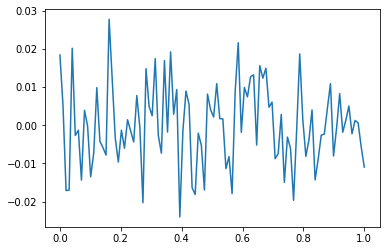

In [3]:
plt.plot(X,y)

### 네트워크 설정, 옵티마이저, 로스 

In [4]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1)) 
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

### 모형학습 

In [5]:
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 

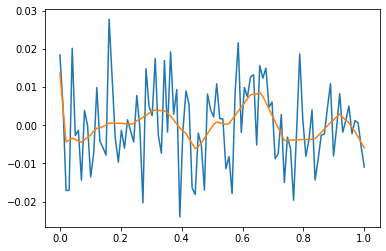

In [6]:
plt.plot(X,y) 
plt.plot(X,yhat.data)

### train / validation 

In [7]:
X1=X[:80]
y1=y[:80]
X2=X[80:]
y2=y[80:] 

In [8]:
torch.manual_seed(1) 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1)) 
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [9]:
for epoc in range(1000): 
    ## 1 
    y1hat=net(X1) 
    ## 2 
    loss=loss_fn(y1hat,y1) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step() 
    net.zero_grad() 

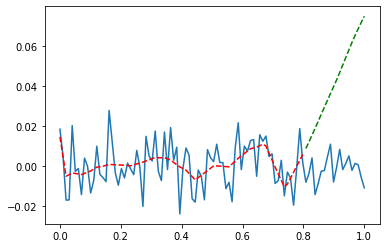

In [10]:
plt.plot(X,y)
plt.plot(X1,net(X1).data,'--r') 
plt.plot(X2,net(X2).data,'--g') 

### 드랍아웃 

In [11]:
X1=X[:80]
y1=y[:80]
X2=X[80:]
y2=y[80:] 

In [12]:
torch.manual_seed(1) 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512), 
    torch.nn.ReLU(),
    torch.nn.Dropout(0.8), # test data를 사용하여 테스트 할 때는 이 부분이 있으면 안된다.
    torch.nn.Linear(in_features=512,out_features=1)) 
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [13]:
for epoc in range(1000): 
    ## 1 
    y1hat=net(X1) 
    ## 2 
    loss=loss_fn(y1hat,y1) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step() 
    net.zero_grad() 

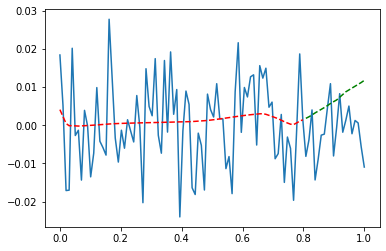

In [14]:
net.eval() ## 네트워크를 평가모드로 전환
plt.plot(X,y)
plt.plot(X1,net(X1).data,'--r') 
plt.plot(X2,net(X2).data,'--g') 

### 학습과정 비교 (주의: 코드복잡함)  

`-` 데이터 생성

In [15]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1) 
y=torch.randn(100).reshape(100,1) 

`-` tr/val( test ) 분리

In [16]:
X_tr=X[:80]
y_tr=y[:80]
X_val=X[80:]
y_val=y[80:] 

`-` 네트워크, 옵티마이저, 손실함수 설정 

- 드랍아웃을 이용한 네트워트 (net2)와 그렇지 않은 네트워크 (net1) 
- 대응하는 옵티마이저 1,2 설정 
- 손실함수 

In [17]:
torch.manual_seed(1) 
net1=torch.nn.Sequential(
    torch.nn.Linear(1,512), 
    torch.nn.ReLU(),
    torch.nn.Linear(512,1)) 
optimizer_net1 = torch.optim.Adam(net1.parameters()) 
net2=torch.nn.Sequential(
    torch.nn.Linear(1,512), 
    torch.nn.ReLU(),
    torch.nn.Dropout(0.8),
    torch.nn.Linear(512,1)) 
optimizer_net2 = torch.optim.Adam(net2.parameters())
loss_fn=torch.nn.MSELoss()

In [18]:
tr_loss_net1=[] 
val_loss_net1=[]
tr_loss_net2=[] 
val_loss_net2=[] 

In [19]:
for epoc in range(1000): 
    ## 1 
    yhat_tr_net1 = net1(X_tr) 
    ## 2 
    loss_tr = loss_fn(yhat_tr_net1, y_tr) 
    ## 3 
    loss_tr.backward() 
    ## 4 
    optimizer_net1.step()
    net1.zero_grad() 
    ## 5 기록 
    ### tr 
    tr_loss_net1.append(loss_tr.item())
    
    ### val 
    yhat_val_net1 = net1(X_val) 
    loss_val = loss_fn(yhat_val_net1,y_val) 
    val_loss_net1.append(loss_val.item())

In [20]:
for epoc in range(1000): 
    ## 1 
    yhat_tr_net2 = net2(X_tr) 
    ## 2 
    loss_tr = loss_fn(yhat_tr_net2, y_tr) 
    ## 3 
    loss_tr.backward() 
    ## 4 
    optimizer_net2.step()
    net2.zero_grad() 
    ## 5 기록 
    ### tr 
    net2.eval()
    tr_loss_net2.append(loss_tr.item())
    ### val 
    yhat_val_net2 = net2(X_val) 
    loss_val = loss_fn(yhat_val_net2,y_val) 
    val_loss_net2.append(loss_val.item())
    net2.train()

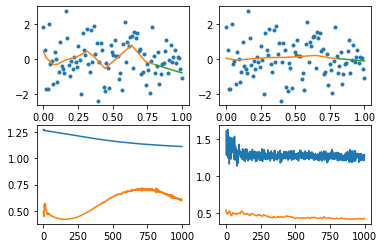

In [21]:
net2.eval() 
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.plot(X,y,'.');ax1.plot(X_tr,net1(X_tr).data); ax1.plot(X_val,net1(X_val).data); 
ax2.plot(X,y,'.');ax2.plot(X_tr,net2(X_tr).data); ax2.plot(X_val,net2(X_val).data); 
ax3.plot(tr_loss_net1);ax3.plot(val_loss_net1);
ax4.plot(tr_loss_net2);ax4.plot(val_loss_net2);

`-` 다 좋은데 코드를 짜는것이 너무 힘들다. 

- 생각해보니까 미니배치도 만들어야 함 + 미니배치를 나눈상태에서 GPU 메모리에 파라메터도 올려야함. 
- 조기종료와 같은 기능도 구현해야함 + 기타등등을 구현해야함. 
- 나중에는 학습률을 서로 다르게 돌려가며 결과도 기록해야함 $\to$ 그래야 좋은 학습률 선택가능 
- for문안에 step1~step4를 넣는것도 너무 반복작업임. 
- 등등.. 

`-` 위와 같은 것들의 특징: 머리로 상상하기는 쉽지만 실제 구현하는 것은 까다롭다. 

`-` 사실 우리가 하고싶은것 

- **아키텍처를 설계**: 데이터를 보고 맞춰서 설계해야할 때가 많음 (우리가 해야한다) 
- 손실함수: 통계학과 교수님들이 연구하심 
- 옵티마이저: 산공교수님들이 연구하심 

`-` 제 생각 

- 기업의욕심: real-data를 분석하는 딥러닝 아키텍처 설계 $\to$ 아키텍처별로 결과를 관찰 (편하게) $\Longrightarrow$ fastai + real data 
- 학생의욕심: 그러면서도 모형이 돌아가는 원리는 아주 세밀하게 알고싶음 $\Longrightarrow$ pytorch + toy example (regression 등을 위주로) 
- 연구자의욕심: 기존의 모형을 조금 변경해서 쓰고싶음 $\Longrightarrow$ (pytorch +fastai) + any data 

`-` **tensorflow + keras** vs **pytorch + fastai** 

### pytorch + fastai 

`-` 데이터셋을 만든다. 

In [22]:
X_tr=X[:80]
y_tr=y[:80]
X_val=X[80:]
y_val=y[80:] 

In [23]:
ds1=torch.utils.data.TensorDataset(X_tr,y_tr) 
ds2=torch.utils.data.TensorDataset(X_val,y_val) 

`-` 데이터로더를 만든다. 

In [24]:
dl1 = torch.utils.data.DataLoader(ds1, batch_size=80) 
dl2 = torch.utils.data.DataLoader(ds2, batch_size=20) 

`-` 데이터로더스를 만든다. 

In [ ]:
!pip install --upgrade fastai

In [26]:
from fastai.vision.all import * 

In [27]:
dls=DataLoaders(dl1,dl2) 

#### 드랍아웃 제외버전 

`-` 네트워크 설계 (드랍아웃 제외) 

In [28]:
torch.manual_seed(1) 
net_fastai = torch.nn.Sequential(
    torch.nn.Linear(in_features=1, out_features=512),
    torch.nn.ReLU(),
    #torch.nn.Dropout(0.8),
    torch.nn.Linear(in_features=512, out_features=1)) 
#optimizer 
loss_fn=torch.nn.MSELoss()

`-` 러너오브젝트 (for문 대신돌려주는 오브젝트) 

In [29]:
lrnr= Learner(dls,net_fastai,opt_func=Adam,loss_func=loss_fn) 
# Learner( dls, 네트워크, optimizer 함수, loss 함수 )

`-` 에폭만 설정하고 바로 학습

In [ ]:
#collapse-output
lrnr.fit(1000)

`-` loss들도 에폭별로 기록되어 있음 

In [ ]:
lrnr.recorder.plot_loss()

`-` net_fastai에도 파라메터가 업데이트 되어있음 

In [32]:
# list(net_fastai.parameters())

- device 가 cuda로 설정되어 있다.

- 리스트를 확인해보면 net_fastai 의 파라메터가 알아서 GPU로 옮겨져서 학습됨. 

`-` 플랏 

In [ ]:
net_fastai.to("cpu") # GPU에 있는 적합 결과를 CPU로 옮김 
plt.plot(X,y,'.')
plt.plot(X_tr,net_fastai(X_tr).data) 
plt.plot(X_val,net_fastai(X_val).data) 

#### 드랍아웃 추가버전 

`-` 네트워크 설계 (드랍아웃 추가) 

In [34]:
torch.manual_seed(1) 
net_fastai = torch.nn.Sequential(
    torch.nn.Linear(in_features=1, out_features=512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.8),
    torch.nn.Linear(in_features=512, out_features=1)) 
#optimizer 
loss_fn=torch.nn.MSELoss()

`-` 러너오브젝트 (for문 대신돌려주는 오브젝트) 

In [35]:
lrnr= Learner(dls,net_fastai,opt_func=Adam,loss_func=loss_fn) 

`-` 에폭만 설정하고 바로 학습

In [36]:
#collapse-output
lrnr.fit(1000)

epoch,train_loss,valid_loss,time
0,1.585671,0.428895,00:00
1,1.552302,0.434828,00:00
2,1.568768,0.442796,00:00
3,1.543477,0.449613,00:00
4,1.562545,0.456714,00:00
5,1.523569,0.459948,00:00
6,1.506777,0.458101,00:00
7,1.510378,0.455332,00:00
8,1.532578,0.449036,00:00
9,1.528131,0.445395,00:00


`-` loss들도 에폭별로 기록되어 있음 

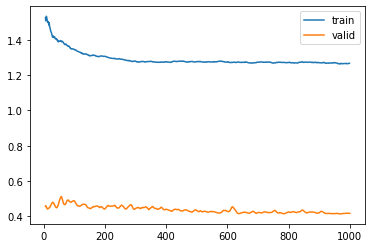

In [40]:
lrnr.recorder.plot_loss()

`-` net_fastai에도 파라메터가 업데이트 되어있음 

In [41]:
# list(net_fastai.parameters())

- 리스트를 확인해보면 net_fastai 의 파라메터가 알아서 GPU로 옮겨져서 학습됨. 

`-` 플랏 

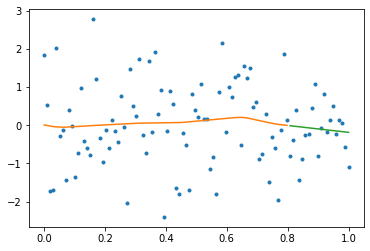

In [42]:
net_fastai.to("cpu") 
plt.plot(X,y,'.')
plt.plot(X_tr,net_fastai(X_tr).data) 
plt.plot(X_val,net_fastai(X_val).data) 

### CPU vs GPU 시간비교

In [43]:
import time 

#### CPU (512) 

In [44]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [45]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1)) 
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [46]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [47]:
t2-t1

0.9442861080169678

#### GPU (512) 

In [48]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [49]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1)) 
net.to("cuda:0")
X=X.to("cuda:0")
y=y.to("cuda:0")
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [50]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [51]:
t2-t1

1.5958292484283447

`-` ?? CPU가 더 빠르다!!

#### CPU (20480) 

In [52]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [53]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=20480), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=20480,out_features=1)) 
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [54]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [55]:
t2-t1

9.473751783370972

#### GPU (20480) 

In [56]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [57]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=20480), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=20480,out_features=1)) 
net.to("cuda:0")
X=X.to("cuda:0")
y=y.to("cuda:0")
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [58]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [59]:
t2-t1

1.6152479648590088

#### CPU (204800) 

In [60]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [61]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=204800), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=204800,out_features=1)) 
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [62]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [63]:
t2-t1

152.07333970069885

#### GPU (204800) 

In [64]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [65]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=204800), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=204800,out_features=1)) 
net.to("cuda:0")
X=X.to("cuda:0")
y=y.to("cuda:0")
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [66]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [67]:
t2-t1

8.372268676757812

### 숙제 

`-` 현재 작업하고 있는 컴퓨터에서 아래코드를 실행후 시간을 출력하여 스샷제출 

#### CPU (512) 

In [68]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [69]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1)) 
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [70]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [71]:
t2-t1

0.9341294765472412